<a href="https://colab.research.google.com/github/HanaeELMEKKI/INSE_6220_Project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INSE_6220_Project

#Install Numpy version (Current Numpy version provided in Google Colab failed to execute Classification code)
!pip uninstall numpy
!pip install numpy==1.20.1

# install pycaret
!pip install pycaret==2.3.6

#Check the installed version
from pycaret.utils import version
version()

#import librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.22.4.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 63.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22

in order to have just numeric values, 
we replace the character in the first column "Sex" by numbers. That means:
M =0
F=1
I=2

The name of columns were reduced to avoid chauvechement in the plots :

Length = LE
Diameter = DI
Height = HE
Whole Weight = WW
Shucked Weight = SW
Viscera Weight = VW
Shell Weight = SHW
Rings = RI
Dataset

The datasets groups/ holds/ contains/ classify eryhemato-Squamos dermatology diseases and classify them in 6 groups : psoriasis, seboreic dermatitis, lichen planus,pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
Datasets contains 366 instances (rows) and 34 attributes , 12 represent patients features and 22 are histopathological features. 
Every feature has a value from 0 to 3, except, the linear feature age (of patients):

 0 indicates that the feature was not present, 
 3 indicates the largest amount possible,
 1, 2 indicate the relative intermediate values.

Attribute Information:
      Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
      1: erythema
      2: scaling
      3: definite borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age (linear)

     Histopathological Attributes: (take values 0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
 
The measurement were conducted through the analysis of samples under a microscope.

https://archive.ics.uci.edu/ml/datasets/seeds

In [2]:
#read cvs file into dataframe -final-data
df = pd.read_csv('https://raw.githubusercontent.com/HanaeELMEKKI/INSE_6220_Project/main/Abalone-data.csv')
df.head(25)

Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0    0.605     0.475   0.180        0.9365          0.3940          0.2190   
1    0.680     0.560   0.165        1.6390          0.6055          0.2805   
2    0.665     0.525   0.165        1.3380          0.5515          0.3575   
3    0.680     0.550   0.175        1.7980          0.8150          0.3925   
4    0.705     0.550   0.200        1.7095          0.6330          0.4115   
5    0.540     0.475   0.155        1.2170          0.5305          0.3075   
6    0.595     0.495   0.185        1.2850          0.4160          0.2240   
7    0.595     0.475   0.170        1.2470          0.4800          0.2250   
8    0.570     0.480   0.175        1.1850          0.4740          0.2610   
9    0.600     0.475   0.150        1.0075          0.4425          0.2210   
10   0.615     0.475   0.170        1.1025          0.4695          0.2355   
11   0.620     0.510   0.175        1.6150          0.5105          0.1920   
12   0.595     0.475   0.160        1.3175          0.4080          0.2340   
13   0.695     0.560   0.190        1.4940          0.5880          0.3425   
14   0.665     0.535   0.195        1.6060          0.5755          0.3880   
15   0.700     0.535   0.160        1.7255          0.6300          0.2635   
16   0.710     0.540   0.165        1.9590          0.7665          0.2610   
17   0.595     0.480   0.165        1.2620          0.4835          0.2830   
18   0.650     0.520   0.190        1.3445          0.5190          0.3060   
19   0.590     0.475   0.145        1.0530          0.4415          0.2620   
20   0.645     0.485   0.215        1.5140          0.5460          0.2615   
21   0.605     0.485   0.160        1.2220          0.5300          0.2575   
22   0.610     0.485   0.175        1.2445          0.5440          0.2970   
23   0.725     0.560   0.210        2.1410          0.6500          0.3980   
24   0.650     0.545   0.230        1.7520          0.5605          0.2895   

    Shell Weight  Rings      Age  
0         0.2950     15  11-30.5  
1         0.4600     15  11-30.5  
2         0.3500     18  11-30.5  
3         0.4550     19  11-30.5  
4         0.4900     13  11-30.5  
5         0.3400     16  11-30.5  
6         0.4850     13  11-30.5  
7         0.4250     20  11-30.5  
8         0.3800     11  11-30.5  
9         0.2800     15  11-30.5  
10        0.3450     14  11-30.5  
11        0.6750     12  11-30.5  
12        0.5800     21  11-30.5  
13        0.4850     15  11-30.5  
14        0.4800     14  11-30.5  
15        0.5400     19  11-30.5  
16        0.7800     18  11-30.5  
17        0.4100     17  11-30.5  
18        0.4465     16  11-30.5  
19        0.3250     15  11-30.5  
20        0.6350     16  11-30.5  
21        0.2800     13  11-30.5  
22        0.3450     12  11-30.5  
23        1.0050     18  11-30.5  
24        0.8150     16  11-30.5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          416 non-null    float64
 1   Diameter        416 non-null    float64
 2   Height          416 non-null    float64
 3   Whole Weight    416 non-null    float64
 4   Shucked Weight  416 non-null    float64
 5   Viscera Weight  416 non-null    float64
 6   Shell Weight    416 non-null    float64
 7   Rings           416 non-null    int64  
 8   Age             392 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 29.4+ KB


In [4]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [5]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  24


Exploratory Data Analysis

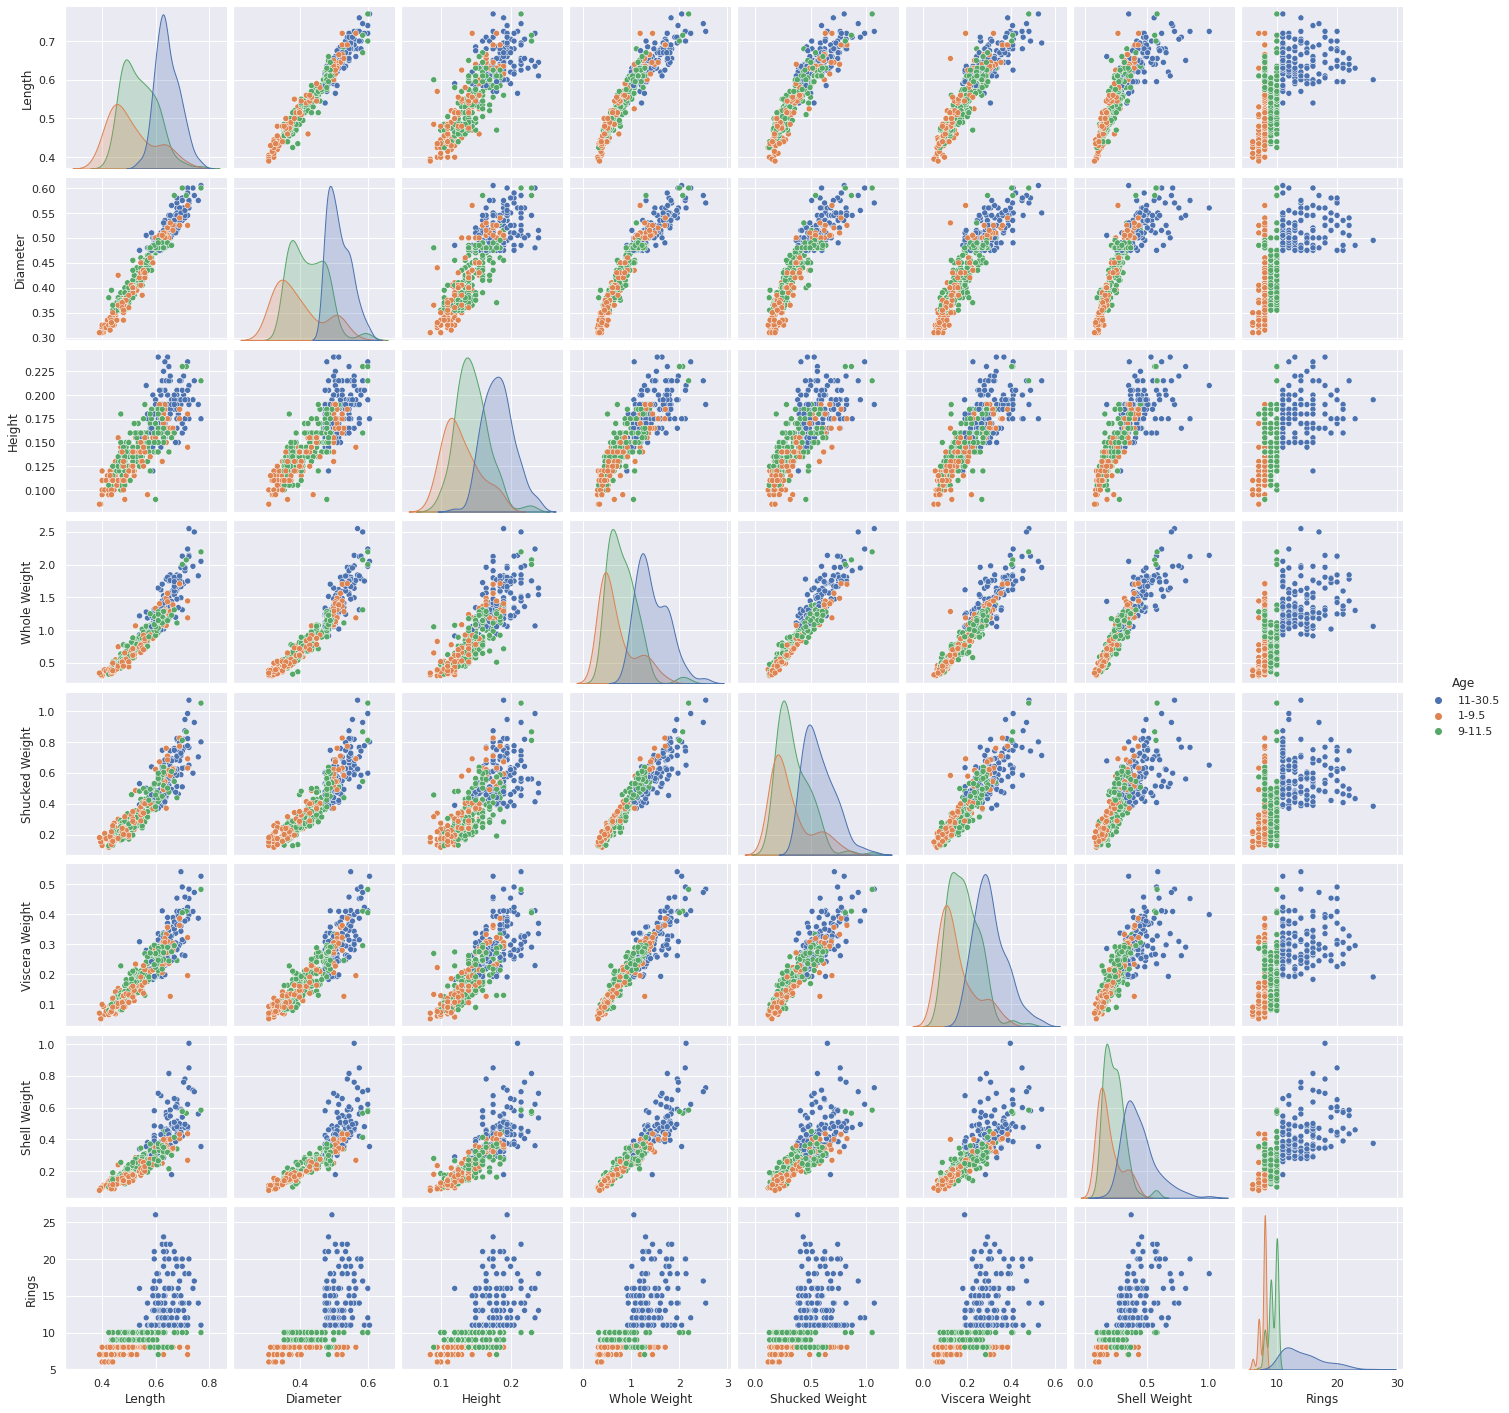

In [6]:
sns.pairplot(df, hue='Age')
plt.show()

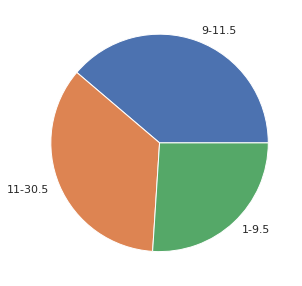

In [7]:
y =df['Age']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [8]:
X = df.drop(columns=['Age'])
X.head(10)

Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.605     0.475   0.180        0.9365          0.3940          0.2190   
1   0.680     0.560   0.165        1.6390          0.6055          0.2805   
2   0.665     0.525   0.165        1.3380          0.5515          0.3575   
3   0.680     0.550   0.175        1.7980          0.8150          0.3925   
4   0.705     0.550   0.200        1.7095          0.6330          0.4115   
5   0.540     0.475   0.155        1.2170          0.5305          0.3075   
6   0.595     0.495   0.185        1.2850          0.4160          0.2240   
7   0.595     0.475   0.170        1.2470          0.4800          0.2250   
8   0.570     0.480   0.175        1.1850          0.4740          0.2610   
9   0.600     0.475   0.150        1.0075          0.4425          0.2210   

   Shell Weight  Rings  
0         0.295     15  
1         0.460     15  
2         0.350     18  
3         0.455     19  
4         0.490     13  
5         0.340     16  
6         0.485     13  
7         0.425     20  
8         0.380     11  
9         0.280     15

In [9]:
X.describe().transpose()

count       mean       std     min       25%       50%  \
Length          416.0   0.571238  0.084100  0.3900  0.500000   0.59000   
Diameter        416.0   0.451791  0.070476  0.3100  0.390000   0.47500   
Height          416.0   0.154387  0.031684  0.0850  0.130000   0.15500   
Whole Weight    416.0   1.012698  0.453799  0.3030  0.615375   1.01450   
Shucked Weight  416.0   0.424085  0.189246  0.1185  0.255750   0.41750   
Viscera Weight  416.0   0.221582  0.096539  0.0505  0.135500   0.22000   
Shell Weight    416.0   0.296606  0.145956  0.0790  0.176875   0.27825   
Rings           416.0  10.548077  3.476960  6.0000  8.000000  10.00000   

                      75%      max  
Length           0.630000   0.7700  
Diameter         0.500000   0.6050  
Height           0.175000   0.2400  
Whole Weight     1.279500   2.5500  
Shucked Weight   0.554125   1.0705  
Viscera Weight   0.286250   0.5410  
Shell Weight     0.365000   1.0050  
Rings           11.000000  26.0000

Standardize the Data

In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length  Diameter    Height  Whole Weight  Shucked Weight  Viscera Weight  \
0  0.401933  0.329717  0.809352     -0.168114       -0.159166       -0.026775   
1  1.294799  1.537256  0.335363      1.381792        0.959773        0.611043   
2  1.116226  1.040034  0.335363      0.717704        0.674086        1.409612   
3  1.294799  1.395193  0.651356      1.732589        2.068130        1.772598   
4  1.592421  1.395193  1.441338      1.537334        1.105261        1.969648   
5 -0.371884  0.329717  0.019370      0.450745        0.562986        0.891061   
6  0.282884  0.613844  0.967348      0.600771       -0.042775        0.025080   
7  0.282884  0.329717  0.493359      0.516933        0.295816        0.035451   
8 -0.014738  0.400749  0.651356      0.380144        0.264073        0.408808   
9  0.342408  0.329717 -0.138627     -0.011469        0.097423       -0.006033   

   Shell Weight     Rings  
0     -0.011015  1.281949  
1      1.120821  1.281949  
2      0.366264  2.145810  
3      1.086522  2.433764  
4      1.326609  0.706041  
5      0.297667  1.569902  
6      1.292311  0.706041  
7      0.880734  2.721718  
8      0.572052  0.130133  
9     -0.113909  1.281949

In [11]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Length          416.0  6.661338e-16  1.001204 -2.157617 -0.848080  0.223360   
Diameter        416.0 -7.686159e-16  1.001204 -2.014330 -0.877822  0.329717   
Height          416.0  2.647455e-16  1.001204 -2.192580 -0.770612  0.019370   
Whole Weight    416.0 -2.903660e-16  1.001204 -1.565787 -0.876603  0.003975   
Shucked Weight  416.0  3.416071e-17  1.001204 -1.616696 -0.890577 -0.034840   
Viscera Weight  416.0  5.978124e-17  1.001204 -1.774293 -0.892756 -0.016404   
Shell Weight    416.0 -1.622634e-16  1.001204 -1.492690 -0.821306 -0.125913   
Rings           416.0 -1.708035e-16  1.001204 -1.309636 -0.733729 -0.157821   

                     75%       max  
Length          0.699555  2.366238  
Diameter        0.684876  2.176542  
Height          0.651356  2.705309  
Whole Weight    0.588637  3.391705  
Shucked Weight  0.687974  3.419851  
Viscera Weight  0.670676  3.312696  
Shell Weight    0.469158  4.859307  
Rings           0.130133  4.449441

Observations and variables

In [12]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

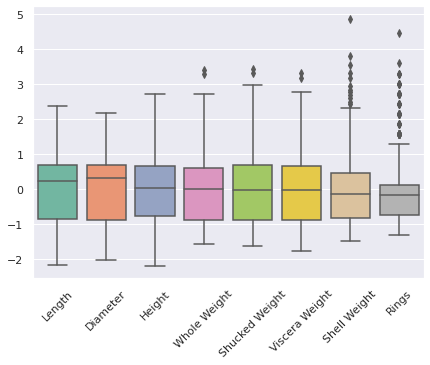

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


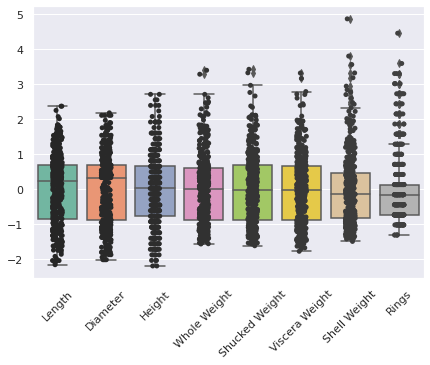

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

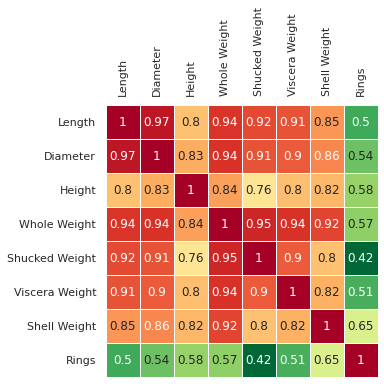

In [15]:
#plt.figure(figsize=(16, 16))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

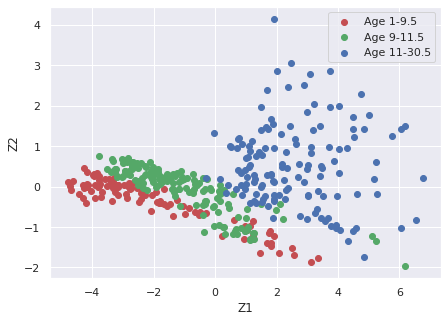

In [16]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(1-8 Rings)->1,  2(9-10 Rings)->2, 3(11-29 Rings)->3

idx_R1 = np.where(df['Age'] == '1-9.5')
idx_R2 = np.where(df['Age'] == '9-11.5')
idx_R3 = np.where(df['Age'] == '11-30.5')

plt. figure()
plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='Age 1-9.5')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='Age 9-11.5')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='Age 11-30.5')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

[[ 0.37259011 -0.18119061  0.14825882 -0.14331292  0.51404864  0.17350291
  -0.70060939  0.02499044]
 [ 0.37526033 -0.11996313  0.08588904 -0.12845681  0.55905081  0.09051775
   0.70700969 -0.01779005]
 [ 0.34432957  0.10520724 -0.89836686 -0.19001492 -0.02418804 -0.15432601
  -0.05169536 -0.0112212 ]
 [ 0.38291834 -0.08539577  0.1170721   0.18073651 -0.24147519 -0.1422649
   0.0313925   0.84863095]
 [ 0.36126481 -0.30887348  0.24946176 -0.06584617 -0.2338438  -0.70280372
  -0.02155643 -0.3980419 ]
 [ 0.36674187 -0.15502697  0.10221663 -0.33571868 -0.55573801  0.61035066
   0.06234441 -0.18180287]
 [ 0.36018002  0.16447739 -0.04937563  0.84678524 -0.02457604  0.19109834
  -0.01584197 -0.2938721 ]
 [ 0.24581596  0.88765354  0.2734157  -0.24515485 -0.01375565 -0.12111109
  -0.03199079 -0.03013529]]


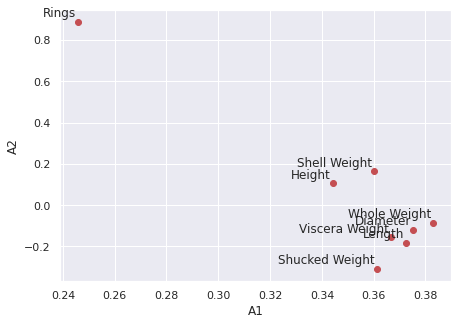

In [17]:
A = pca.components_.T 
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


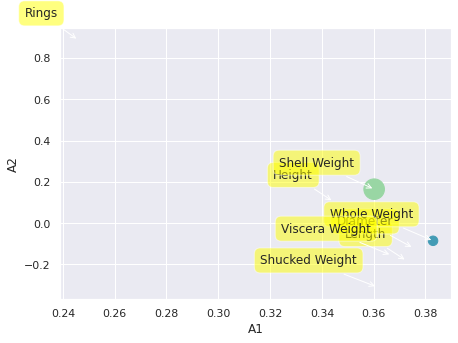

In [18]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

[6.63170975 0.72589752 0.24774643 0.16421836 0.12623462 0.08724346
 0.02675813 0.00946884]


Text(0, 0.5, 'Explained variance')

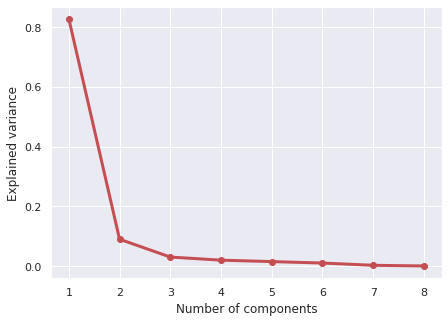

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

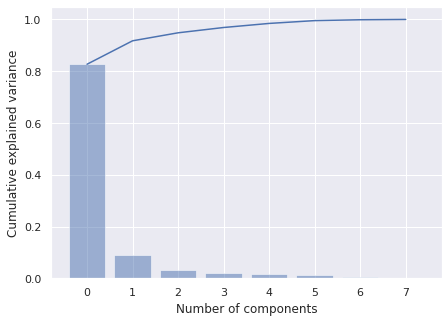

In [20]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

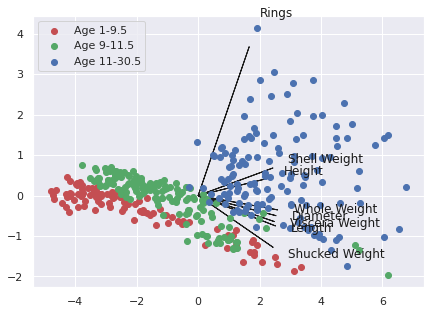

In [21]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='Age 1-9.5')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='Age 9-11.5')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='Age 11-30.5')
plt.legend(loc='upper left')

### **Using PCA Library**

In [22]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components= 0.90)
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [24]:
out['PC']

PC1       PC2
0    0.731631  1.176553
1    2.993537  0.429363
2    2.616358  1.185221
3    4.280541  0.944051
4    3.974868 -0.237364
..        ...       ...
411  0.982229 -1.091231
412  0.302458 -0.999355
413  0.990172 -0.786712
414  0.714229 -1.163958
415  1.141625 -1.322039

[416 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [94.83%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (9.05% expl.var)'>)

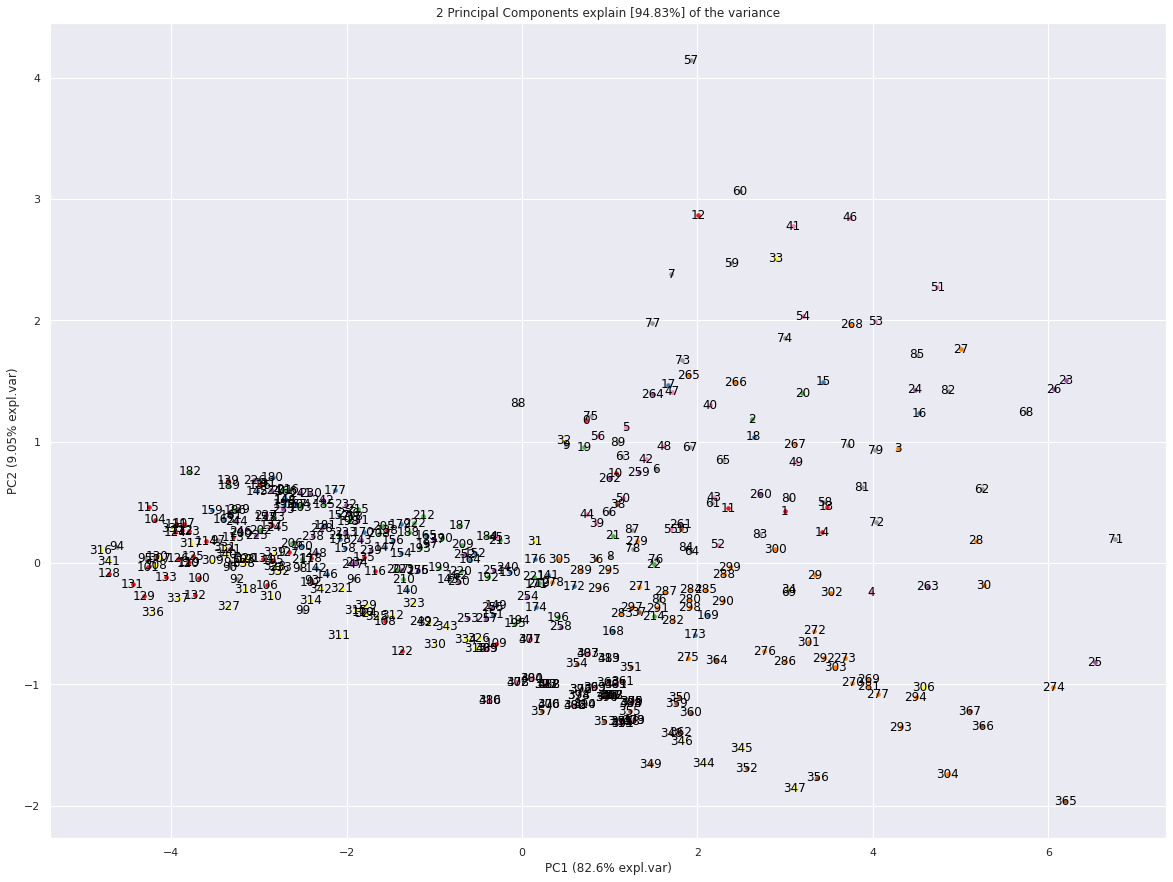

In [25]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [26]:
A = out['loadings'].T

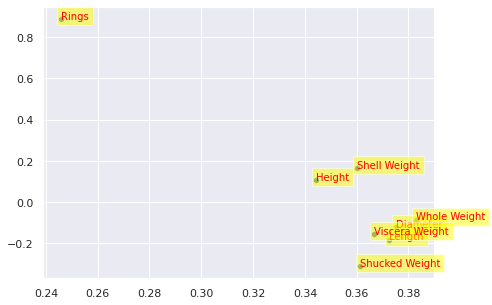

In [27]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i],y=A.PC2[i], s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

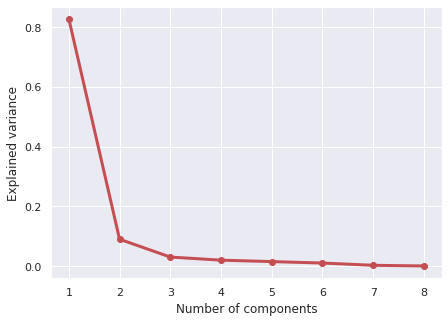

In [28]:

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()
     

**Explained Variance Plot**

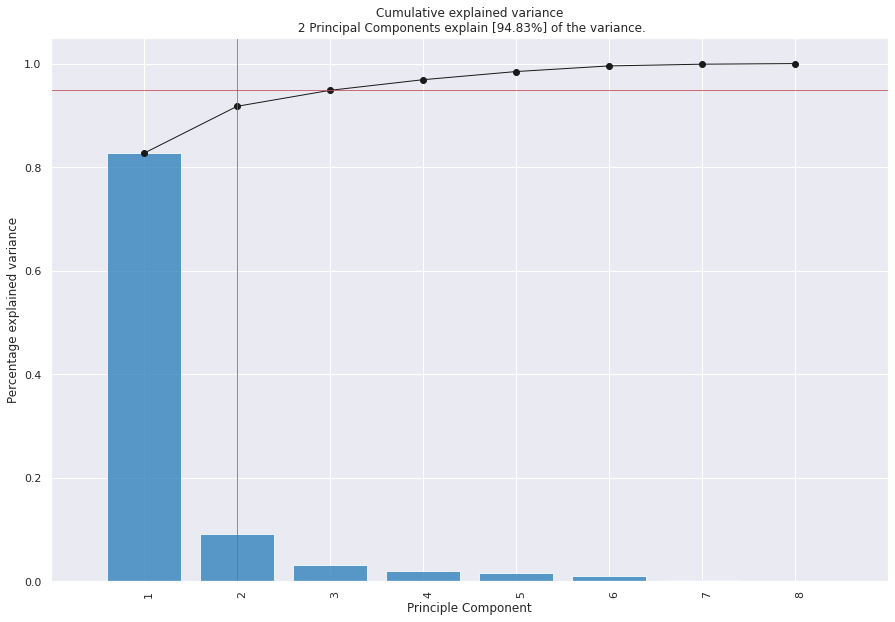

<Figure size 504x360 with 0 Axes>

In [29]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [94.83%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (9.05% expl.var)'>)

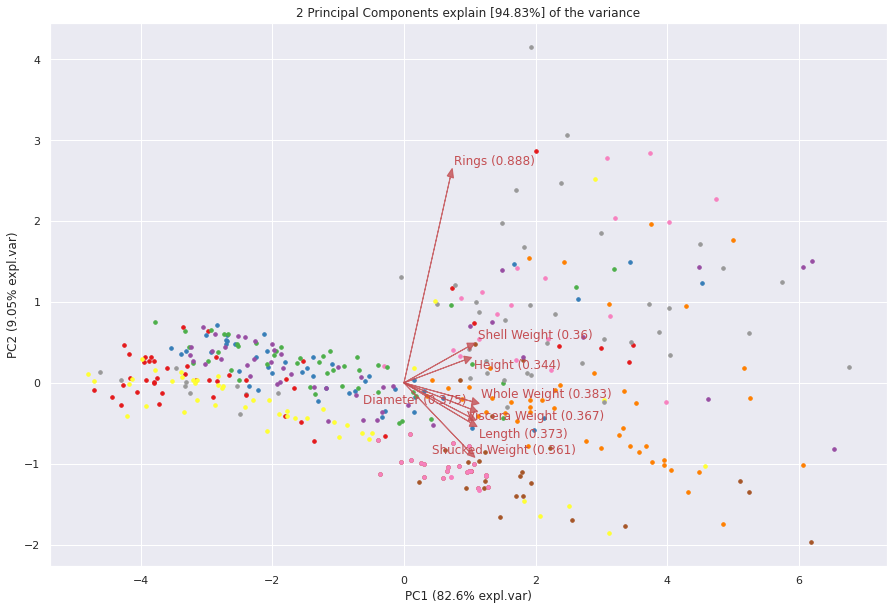

In [30]:
model.biplot(label=False, legend=False)

In [31]:

model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

# **Classification**

**Using PyCaret**

In [32]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [33]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (374, 9)
Unseen Data For Predictions: (42, 9)


**Setting up the Environment in PyCaret**

In [34]:

from pycaret.classification import *
clf = setup(data=data, target='Age', train_size=0.7, session_id=123)

Description                            Value
0                               session_id                              123
1                                   Target                              Age
2                              Target Type                       Multiclass
3                            Label Encoded  1-9.5: 0, 11-30.5: 1, 9-11.5: 2
4                            Original Data                         (374, 9)
5                           Missing Values                             True
6                         Numeric Features                                7
7                     Categorical Features                                1
8                         Ordinal Features                            False
9                High Cardinality Features                            False
10                 High Cardinality Method                             None
11                   Transformed Train Set                        (249, 25)
12                    Transformed Test Set                        (102, 25)
13                      Shuffle Train-Test                             True
14                     Stratify Train-Test                            False
15                          Fold Generator                  StratifiedKFold
16                             Fold Number                               10
17                                CPU Jobs                               -1
18                                 Use GPU                            False
19                          Log Experiment                            False
20                         Experiment Name                 clf-default-name
21                                     USI                             98c8
22                         Imputation Type                           simple
23          Iterative Imputation Iteration                             None
24                         Numeric Imputer                             mean
25      Iterative Imputation Numeric Model                             None
26                     Categorical Imputer                         constant
27  Iterative Imputation Categorical Model                             None
28           Unknown Categoricals Handling                   least_frequent
29                               Normalize                            False
30                        Normalize Method                             None
31                          Transformation                            False
32                   Transformation Method                             None
33                                     PCA                            False
34                              PCA Method                             None
35                          PCA Components                             None
36                     Ignore Low Variance                            False
37                     Combine Rare Levels                            False
38                    Rare Level Threshold                             None
39                         Numeric Binning                            False
40                         Remove Outliers                            False
41                      Outliers Threshold                             None
42                Remove Multicollinearity                            False
43             Multicollinearity Threshold                             None
44             Remove Perfect Collinearity                             True
45                              Clustering                            False
46                    Clustering Iteration                             None
47                     Polynomial Features                            False
48                       Polynomial Degree                             None
49                    Trignometry Features                            False
50                    Polynomial Threshold                             None
51                          Group Features                            False
52 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [35]:
 #show the best model and their statistics
!pip install numpy==1.23.5
best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9918  0.9946  0.9933  0.9930   
gbc          Gradient Boosting Classifier    0.9880  0.9956  0.9886  0.9895   
xgboost         Extreme Gradient Boosting    0.9720  0.9952  0.9724  0.9750   
lightgbm  Light Gradient Boosting Machine    0.9720  0.9910  0.9720  0.9752   
et                 Extra Trees Classifier    0.9680  0.9947  0.9654  0.9712   
knn                K Neighbors Classifier    0.9600  0.9874  0.9553  0.9651   
rf               Random Forest Classifier    0.9560  0.9948  0.9542  0.9597   
ridge                    Ridge Classifier    0.9400  0.0000  0.9496  0.9548   
nb                            Naive Bayes    0.9318  0.9899  0.9418  0.9493   
lr                    Logistic Regression    0.9280  0.9874  0.9346  0.9401   
svm                   SVM - Linear Kernel    0.9197  0.0000  0.9204  0.9301   
ada                  Ada Boost Classifier    0.9080  0.9808  0.8944  0.9132   
lda          Linear Discriminant Analysis    0.8760  0.9498  0.8854  0.8871   
dummy                    Dummy Classifier    0.3937  0.5000  0.3333  0.1553   
qda       Quadratic Discriminant Analysis    0.2530  0.0000  0.3333  0.0643   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9919  0.9876  0.9881     0.010  
gbc       0.9880  0.9818  0.9824     0.290  
xgboost   0.9713  0.9573  0.9593     0.149  
lightgbm  0.9716  0.9573  0.9591     0.160  
et        0.9675  0.9511  0.9529     0.223  
knn       0.9593  0.9386  0.9416     0.013  
rf        0.9551  0.9326  0.9351     0.164  
ridge     0.9408  0.9100  0.9166     0.009  
nb        0.9331  0.8978  0.9051     0.011  
lr        0.9285  0.8917  0.8971     0.265  
svm       0.9198  0.8781  0.8829     0.013  
ada       0.9031  0.8581  0.8641     0.069  
lda       0.8757  0.8130  0.8185     0.019  
dummy     0.2226  0.0000  0.0000     0.010  
qda       0.1025  0.0000  0.0000     0.013

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [36]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

*   Decision Tree Classifier ('dt')
*   K Neighbors Classifier ('knn')
*   Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [37]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9600  0.9737  0.9667  0.9657  0.9605  0.9393  0.9416
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9583  0.9722  0.9667  0.9643  0.9588  0.9368  0.9393
Mean    0.9918  0.9946  0.9933  0.9930  0.9919  0.9876  0.9881
SD      0.0163  0.0108  0.0133  0.0140  0.0161  0.0248  0.0238

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [38]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [39]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9600  1.0000  0.9630  0.9636  0.9598  0.9386  0.9409
1       0.9600  0.9649  0.9667  0.9640  0.9600  0.9389  0.9412
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9200  0.9330  0.9111  0.9240  0.9192  0.8765  0.8788
4       0.9600  0.9675  0.9667  0.9640  0.9600  0.9389  0.9412
5       0.9600  0.9987  0.9630  0.9636  0.9598  0.9386  0.9409
6       0.8400  0.9625  0.8307  0.8650  0.8384  0.7561  0.7695
7       0.9600  0.9989  0.9524  0.9640  0.9595  0.9393  0.9416
8       0.9200  0.9671  0.9107  0.9236  0.9194  0.8778  0.8799
9       0.9583  0.9674  0.9667  0.9630  0.9585  0.9365  0.9390
Mean    0.9438  0.9760  0.9431  0.9495  0.9435  0.9141  0.9173
SD      0.0407  0.0214  0.0453  0.0350  0.0412  0.0622  0.0591

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [40]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [41]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [43]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0        0.920  0.9238  0.8889  0.9333  0.9156  0.8750  0.8842
1        0.960  0.9884  0.9444  0.9636  0.9591  0.9381  0.9405
2        0.960  0.9976  0.9667  0.9657  0.9605  0.9393  0.9416
3        0.920  0.9662  0.9296  0.9257  0.9204  0.8783  0.8805
4        0.960  1.0000  0.9667  0.9657  0.9605  0.9393  0.9416
5        1.000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6        1.000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7        0.960  1.0000  0.9524  0.9640  0.9595  0.9393  0.9416
8        0.920  0.9976  0.9048  0.9333  0.9170  0.8768  0.8858
9        1.000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean     0.960  0.9874  0.9553  0.9651  0.9593  0.9386  0.9416
SD       0.031  0.0234  0.0374  0.0269  0.0319  0.0477  0.0451

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [44]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9200  0.9817  0.8889  0.9333  0.9156  0.8750  0.8842
1       0.9200  0.9952  0.9111  0.9200  0.9200  0.8775  0.8775
2       0.9600  0.9976  0.9444  0.9636  0.9591  0.9381  0.9405
3       0.9200  0.9636  0.9111  0.9200  0.9200  0.8775  0.8775
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9600  0.9989  0.9524  0.9640  0.9595  0.9393  0.9416
8       0.9200  0.9902  0.9048  0.9333  0.9170  0.8768  0.8858
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9600  0.9927  0.9513  0.9634  0.9591  0.9384  0.9407
SD      0.0358  0.0112  0.0434  0.0331  0.0366  0.0552  0.0532

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [45]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [46]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9200  0.9857  0.9333  0.9400  0.9213  0.8798  0.8884
1       0.9200  0.9905  0.9333  0.9400  0.9213  0.8798  0.8884
2       0.8400  0.9714  0.8444  0.8600  0.8425  0.7596  0.7670
3       0.9200  0.9697  0.9333  0.9400  0.9213  0.8798  0.8884
4       0.9600  1.0000  0.9667  0.9657  0.9605  0.9393  0.9416
5       0.9200  0.9905  0.9333  0.9400  0.9213  0.8798  0.8884
6       0.8800  0.9908  0.8677  0.8773  0.8764  0.8180  0.8200
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9200  0.9760  0.9333  0.9378  0.9206  0.8804  0.8889
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9280  0.9874  0.9346  0.9401  0.9285  0.8917  0.8971
SD      0.0466  0.0110  0.0471  0.0427  0.0465  0.0702  0.0681

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [47]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9200  0.9857  0.9333  0.9400  0.9213  0.8798  0.8884
1       0.9200  0.9878  0.9333  0.9400  0.9213  0.8798  0.8884
2       0.8800  0.9714  0.9000  0.9200  0.8814  0.8214  0.8394
3       0.9200  0.9649  0.9333  0.9400  0.9213  0.8798  0.8884
4       0.9600  1.0000  0.9667  0.9657  0.9605  0.9393  0.9416
5       0.9200  0.9905  0.9333  0.9400  0.9213  0.8798  0.8884
6       0.9600  0.9931  0.9630  0.9650  0.9602  0.9399  0.9422
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9200  0.9760  0.9333  0.9378  0.9206  0.8804  0.8889
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9400  0.9869  0.9496  0.9548  0.9408  0.9100  0.9166
SD      0.0369  0.0119  0.0306  0.0259  0.0364  0.0551  0.0501

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [48]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [49]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9200  0.9920  0.9111  0.9240  0.9192  0.8765  0.8788
1       0.9200  0.9979  0.9333  0.9297  0.9181  0.8789  0.8854
2       0.9600  1.0000  0.9630  0.9636  0.9598  0.9386  0.9409
3       0.9200  0.9813  0.9111  0.9240  0.9192  0.8765  0.8788
4       0.9600  0.9923  0.9667  0.9640  0.9600  0.9389  0.9412
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9600  0.9978  0.9524  0.9640  0.9595  0.9393  0.9416
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9200  0.9867  0.9048  0.9281  0.9155  0.8775  0.8841
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9560  0.9948  0.9542  0.9597  0.9551  0.9326  0.9351
SD      0.0332  0.0062  0.0362  0.0306  0.0341  0.0509  0.0492

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [50]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9600  0.9612  0.9667  0.9640  0.9600  0.9389  0.9412
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9200  0.9262  0.9111  0.9240  0.9192  0.8765  0.8788
4       0.9600  1.0000  0.9667  0.9640  0.9600  0.9389  0.9412
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8400  0.9390  0.8307  0.8650  0.8384  0.7561  0.7695
7       0.9600  1.0000  0.9524  0.9640  0.9595  0.9393  0.9416
8       0.9600  0.9671  0.9524  0.9644  0.9596  0.9392  0.9415
9       0.9583  0.9635  0.9667  0.9630  0.9585  0.9365  0.9390
Mean    0.9558  0.9757  0.9547  0.9608  0.9555  0.9325  0.9353
SD      0.0454  0.0268  0.0489  0.0390  0.0459  0.0694  0.0659

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

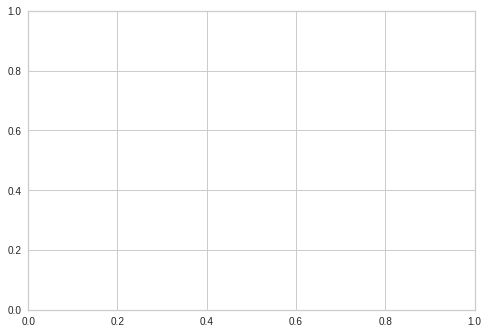

In [51]:
evaluate_model(tuned_rf)

# **Tune the Best Model**

In [52]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9600  1.0000  0.9630  0.9636  0.9598  0.9386  0.9409
1       0.9600  0.9649  0.9667  0.9640  0.9600  0.9389  0.9412
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9200  0.9330  0.9111  0.9240  0.9192  0.8765  0.8788
4       0.9600  0.9675  0.9667  0.9640  0.9600  0.9389  0.9412
5       0.9600  0.9987  0.9630  0.9636  0.9598  0.9386  0.9409
6       0.8400  0.9625  0.8307  0.8650  0.8384  0.7561  0.7695
7       0.9600  0.9989  0.9524  0.9640  0.9595  0.9393  0.9416
8       0.9200  0.9671  0.9107  0.9236  0.9194  0.8778  0.8799
9       0.9583  0.9674  0.9667  0.9630  0.9585  0.9365  0.9390
Mean    0.9438  0.9760  0.9431  0.9495  0.9435  0.9141  0.9173
SD      0.0407  0.0214  0.0453  0.0350  0.0412  0.0622  0.0591

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [53]:
tuned_best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [54]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [55]:
clf_pca = setup(data=data, target='Age', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description                            Value
0                               session_id                              123
1                                   Target                              Age
2                              Target Type                       Multiclass
3                            Label Encoded  1-9.5: 0, 11-30.5: 1, 9-11.5: 2
4                            Original Data                         (374, 9)
5                           Missing Values                             True
6                         Numeric Features                                7
7                     Categorical Features                                1
8                         Ordinal Features                            False
9                High Cardinality Features                            False
10                 High Cardinality Method                             None
11                   Transformed Train Set                         (249, 3)
12                    Transformed Test Set                         (102, 3)
13                      Shuffle Train-Test                             True
14                     Stratify Train-Test                            False
15                          Fold Generator                  StratifiedKFold
16                             Fold Number                               10
17                                CPU Jobs                               -1
18                                 Use GPU                            False
19                          Log Experiment                            False
20                         Experiment Name                 clf-default-name
21                                     USI                             92fe
22                         Imputation Type                           simple
23          Iterative Imputation Iteration                             None
24                         Numeric Imputer                             mean
25      Iterative Imputation Numeric Model                             None
26                     Categorical Imputer                         constant
27  Iterative Imputation Categorical Model                             None
28           Unknown Categoricals Handling                   least_frequent
29                               Normalize                             True
30                        Normalize Method                           zscore
31                          Transformation                            False
32                   Transformation Method                             None
33                                     PCA                             True
34                              PCA Method                           linear
35                          PCA Components                                3
36                     Ignore Low Variance                            False
37                     Combine Rare Levels                            False
38                    Rare Level Threshold                             None
39                         Numeric Binning                            False
40                         Remove Outliers                            False
41                      Outliers Threshold                             None
42                Remove Multicollinearity                            False
43             Multicollinearity Threshold                             None
44             Remove Perfect Collinearity                             True
45                              Clustering                            False
46                    Clustering Iteration                             None
47                     Polynomial Features                            False
48                       Polynomial Degree                             None
49                    Trignometry Features                            False
50                    Polynomial Threshold                             None
51                          Group Features                            False
52 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='Age')),
                ('fix_perfect', Remove_100(target='Age')),
                ('clean_names', Clean_Colum_Names()),
           

In [56]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8397  0.9097  0.8270  0.8523   
rf               Random Forest Classifier    0.8275  0.9404  0.8266  0.8390   
et                 Extra Trees Classifier    0.8273  0.9244  0.8243  0.8415   
xgboost         Extreme Gradient Boosting    0.8157  0.9339  0.8111  0.8246   
gbc          Gradient Boosting Classifier    0.8077  0.9142  0.8044  0.8221   
lightgbm  Light Gradient Boosting Machine    0.8075  0.9295  0.8003  0.8210   
lr                    Logistic Regression    0.7717  0.9047  0.7654  0.7822   
qda       Quadratic Discriminant Analysis    0.7675  0.9072  0.7687  0.7825   
dt               Decision Tree Classifier    0.7670  0.8215  0.7647  0.7798   
lda          Linear Discriminant Analysis    0.7555  0.9004  0.7452  0.7719   
ridge                    Ridge Classifier    0.7475  0.0000  0.7320  0.7552   
nb                            Naive Bayes    0.7235  0.8927  0.7112  0.7433   
ada                  Ada Boost Classifier    0.7148  0.8533  0.7116  0.7320   
svm                   SVM - Linear Kernel    0.6917  0.0000  0.6962  0.6924   
dummy                    Dummy Classifier    0.3937  0.5000  0.3333  0.1553   

              F1   Kappa     MCC  TT (Sec)  
knn       0.8359  0.7530  0.7599     0.017  
rf        0.8266  0.7376  0.7434     0.287  
et        0.8254  0.7365  0.7438     0.140  
xgboost   0.8136  0.7181  0.7229     0.063  
gbc       0.8073  0.7059  0.7125     0.200  
lightgbm  0.8053  0.7049  0.7115     0.041  
lr        0.7694  0.6511  0.6567     0.014  
qda       0.7669  0.6446  0.6506     0.015  
dt        0.7646  0.6444  0.6510     0.010  
lda       0.7534  0.6252  0.6333     0.010  
ridge     0.7393  0.6126  0.6224     0.011  
nb        0.7204  0.5741  0.5841     0.011  
ada       0.7078  0.5690  0.5806     0.120  
svm       0.6668  0.5344  0.5590     0.023  
dummy     0.2226  0.0000  0.0000     0.009

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [57]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [58]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.8613  0.7667  0.7945  0.7880  0.6891  0.6962
1       0.8800  0.9106  0.8778  0.9100  0.8823  0.8157  0.8302
2       0.9200  0.9493  0.9074  0.9236  0.9191  0.8762  0.8785
3       0.7600  0.9113  0.7296  0.7947  0.7541  0.6222  0.6340
4       0.8400  0.9211  0.8407  0.8400  0.8400  0.7549  0.7549
5       1.0000  0.9987  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8000  0.9031  0.7831  0.8298  0.7948  0.6936  0.7061
7       0.8000  0.9156  0.7831  0.8298  0.7948  0.6936  0.7061
8       0.8000  0.9295  0.7964  0.8240  0.8022  0.6951  0.7020
9       0.8750  0.9268  0.9000  0.8976  0.8702  0.8125  0.8276
Mean    0.8475  0.9227  0.8385  0.8644  0.8446  0.7653  0.7736
SD      0.0686  0.0332  0.0782  0.0628  0.0707  0.1067  0.1041

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [59]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [60]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Explainable AI with Shapley values**
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [61]:
!pip install shap
print("Numpy version: ", np.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Numpy version:  1.22.4


In [62]:
!pip install numba==0.53
     
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [63]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8800  0.9264  0.8556  0.8945  0.8760  0.8134  0.8219
1       0.8400  0.9240  0.8444  0.8700  0.8380  0.7567  0.7737
2       0.8400  0.9569  0.8630  0.8500  0.8368  0.7596  0.7670
3       0.8400  0.9234  0.8407  0.8400  0.8400  0.7549  0.7549
4       0.8000  0.9479  0.8037  0.8064  0.8011  0.6959  0.6976
5       0.8000  0.9622  0.8074  0.8211  0.8050  0.6988  0.7039
6       0.8400  0.9279  0.8307  0.8560  0.8396  0.7561  0.7618
7       0.7600  0.9074  0.7460  0.7640  0.7551  0.6341  0.6389
8       0.8000  0.9555  0.7964  0.8129  0.8011  0.6973  0.7024
9       0.8750  0.9721  0.8778  0.8750  0.8729  0.8095  0.8117
Mean    0.8275  0.9404  0.8266  0.8390  0.8266  0.7376  0.7434
SD      0.0353  0.0201  0.0369  0.0367  0.0347  0.0529  0.0539

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [64]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8800  0.9344  0.8778  0.8945  0.8796  0.8171  0.8251
1       0.8400  0.9106  0.8444  0.8700  0.8380  0.7567  0.7737
2       0.8400  0.9375  0.8630  0.8700  0.8419  0.7613  0.7743
3       0.8800  0.9330  0.8778  0.8796  0.8779  0.8166  0.8186
4       0.7600  0.9367  0.7704  0.7625  0.7594  0.6359  0.6375
5       0.8800  0.9782  0.8963  0.8956  0.8814  0.8193  0.8253
6       0.8400  0.9086  0.8307  0.8560  0.8396  0.7561  0.7618
7       0.7600  0.9094  0.7460  0.7731  0.7587  0.6341  0.6405
8       0.8400  0.9395  0.8440  0.8596  0.8442  0.7579  0.7634
9       0.8750  0.9640  0.9000  0.8976  0.8702  0.8125  0.8276
Mean    0.8395  0.9352  0.8450  0.8558  0.8391  0.7568  0.7648
SD      0.0434  0.0217  0.0487  0.0462  0.0433  0.0663  0.0678

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


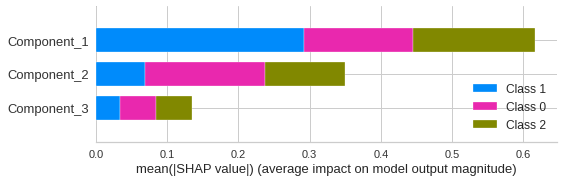

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [65]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [66]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**

In [67]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
